In [2]:
import numpy as np
import matplotlib.pylab as pylab
%pylab notebook
pylab.rcParams['figure.figsize'] = (10, 6)

import matplotlib.pyplot as plt
from numpy import linalg as LA

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
hbar=1.
mass=1.
a=1.
b=1/6.
l=10.
nb=l/a 
v0=100.
dimMat=100

In [4]:
x=np.linspace(0,l,1000)

In [5]:
def vinf(x,l):
    v = np.piecewise(x, [(x > 0) & (x < l),x <= 0,x >= l], [lambda x: 0, lambda x: np.inf,lambda x: np.inf])
    return v

<IPython.core.display.Javascript object>


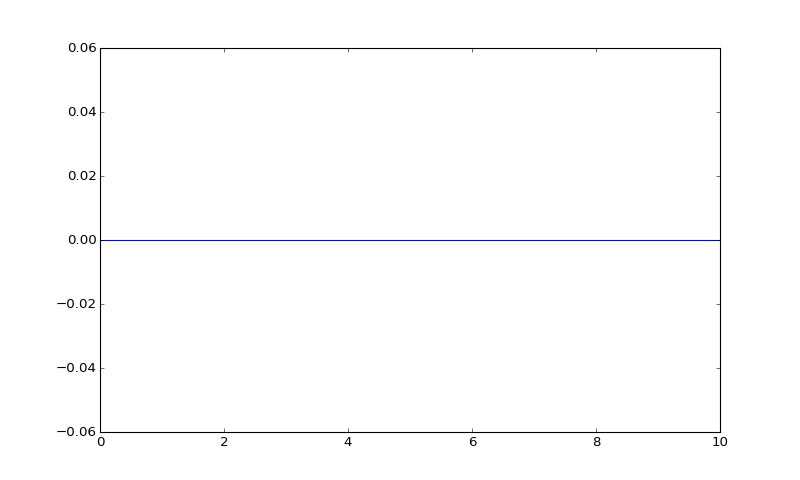

In [6]:
figure()
plt.plot(x, vinf(x,l))
plt.show()

In [7]:
xr = lambda a,r: -a/2. + r*a 
xr(1,10)

9.5

In [8]:
def vkp(x,v0,a,b,n):
    kpot = 0
    for i in range(0,int(n)+1):
        vk = np.piecewise(x, [np.absolute(x-xr(a,i))< b/2.], [lambda x: v0])
        kpot = kpot + vk
    
    return kpot

In [10]:
vinf(x,l) + vkp(x,v0,a,b,nb);

<IPython.core.display.Javascript object>


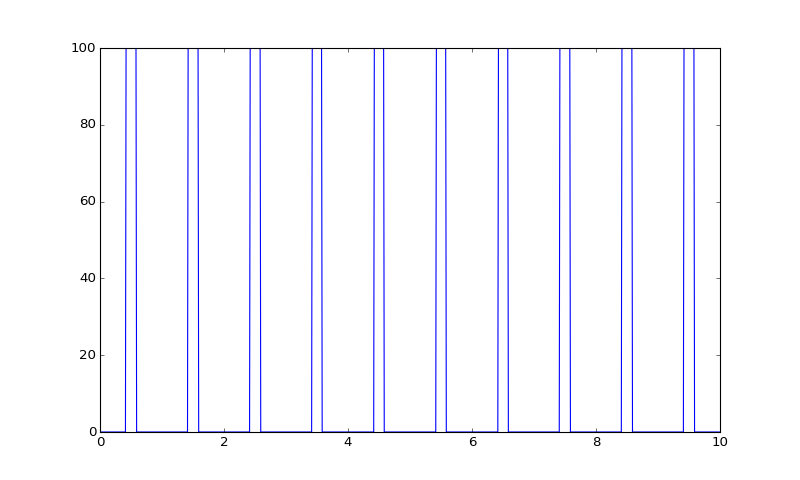

In [11]:
figure()
plt.plot(x, vinf(x,l) + vkp(x,v0,a,b,nb))
plt.show()

In [201]:
def ene(p,l,hbar,mass):
    """This funtion returns the enery of an infinite square well
    Args:
        p (int)   : Specifies the quantum number.
        l (float) : Length of the infinite square well.
        hbar      : Planck's constant.
        mass      : Mass of electron.
        
    Output: Energy of the p'th state.
    
    Example: ene(1,10,1,1)
    result:  0.098696044010893
     """
    return p**2*np.pi**2*hbar**2/(2*mass*l**2)

In [202]:
ene(1,10,1,1)*2

0.09869604401089357

In [14]:
def f(n,m,x,l):
    """ It gives out Equations 16 or 17 in the paper, "Numerical matrix method for quantum periodic potentials, 
    Felipe et al, doi: http://dx.doi.org/10.1119/1.4944706"
    
    Args: 
    n (int) and m (int): They correspond to the row and coloumn vector of the hamiltonian matrix.
    x (float)          : Function will be evaluated at x.
    l (flaot)          : Length of the infinite square well.
    """
    if n==m:
        return x/l - np.sin(2*n*np.pi*x/l)/(2*np.pi*n)
    else:
        return np.sin((m-n)*np.pi*x/l)/((m-n)*np.pi) - np.sin((m+n)*np.pi*x/l)/((m+n)*np.pi)
    

In [15]:
def hnm(n,m,s,b,l):
    """ It gives out Equation 15 in the paper, "Numerical matrix method for quantum periodic potentials, 
    Felipe et al, doi: http://dx.doi.org/10.1119/1.4944706"
    hnm are the matrix elements;
    
     Args: 
    n (int) and m (int): They correspond to the row and coloumn vector of the hamiltonian matrix.
    s (float)          : Definies the integral limits.
    b (float)          : Width of the well.
    l (flaot)          : Length of the infinite square well.
    
    """
    return f(n,m,s+b/2.,l)- f(n,m,s-b/2.,l)

In [16]:
def hkp(n,m,l,v0,a,b):
    """
    It gives out Equation 14 in the paper, "Numerical matrix method for quantum periodic potentials, 
    Felipe et al, doi: http://dx.doi.org/10.1119/1.4944706"
    hkp are the matrix elements for kronig penny potential;
    
     Args: 
    n (int) and m (int): They correspond to the row and coloumn vector of the hamiltonian matrix.
    s (float)          : Definies the integral limits.
    b (float)          : Width of the well.
    l (flaot)          : Length of the infinite square well.
    
    """
    s = 0.
    if n==m:
        e = ene(n,l,hbar,mass)*2.
    else:
        e=0.
        
    for i in range(1,int(nb)+1):
        s = s + hnm(n,m,xr(a,i),b,l)
        #print i,s
    #print e,s    
    return e + v0*s
        

In [17]:
hkp(1,3,l,v0,a,b)

3.4694469519536142e-14

In [18]:
def kpMat(dim):
    hMat = [[0 for x in range(int(dim))] for y in range(int(dim))] 
    for i in range(int(dim)):
        for j in range(int(dim)):
            hMat[i][j] = hkp(i+1,j+1,l,v0,a,b)
    return hMat

In [19]:
kpMat(dimMat);

In [20]:
eigVal,eigVec = LA.eigh(kpMat(dimMat))
#eigVal.sort()
en=eigVal/np.pi**2
en

array([   0.79128688,    0.80752328,    0.83363374,    0.86813295,
          0.90875773,    0.95231791,    0.99461119,    1.03058179,
          1.05498209,    3.10640562,    3.12979922,    3.19796669,
          3.3054628 ,    3.4446143 ,    3.60628985,    3.77966991,
          3.95100675,    4.10186091,    4.20868889,    4.24633301,
          6.95193598,    7.12038821,    7.37366226,    7.68757221,
          8.04210414,    8.41972459,    8.8005539 ,    9.15402797,
          9.42539724,   12.12615277,   12.25618797,   12.59713032,
         13.06734953,   13.61337355,   14.2065625 ,   14.8294714 ,
         15.46615842,   16.09039703,   16.63246179,   16.87865293,
         19.20488331,   19.81624991,   20.5571    ,   21.35946647,
         22.20026213,   23.06913254,   23.95875991,   24.85813954,
         25.72863891,   27.49747413,   28.05525248,   28.99148545,
         30.00102398,   31.04633655,   32.11848552,   33.21417772,
         34.33168544,   35.46936752,   36.6224455 ,   37.60756

In [21]:
ks=np.arange(0,3,1/l)
ks

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9])

In [22]:
enn=[ en[i] for i in range(len(ks))]
enn;

<IPython.core.display.Javascript object>


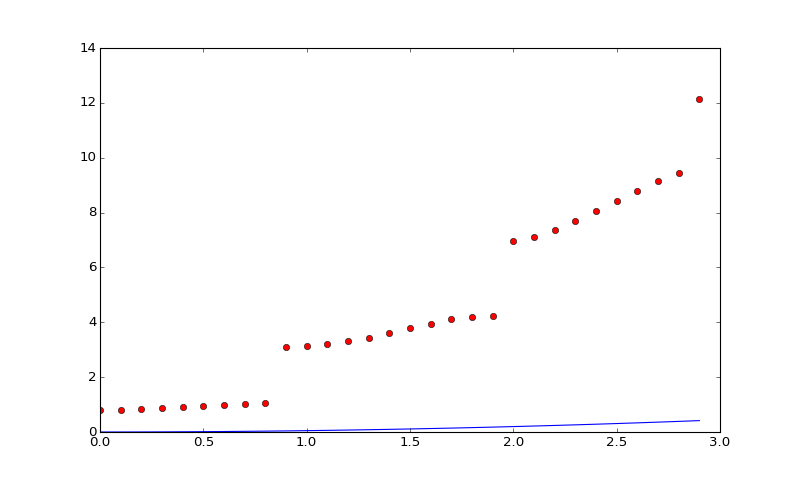

In [23]:
figure()
plt.plot(ks, enn,'ro')
plt.plot(ks,ene(ks,l,hbar,mass))
plt.show()

In [24]:
def psi(n):
    s=0
    for i in range(1,len(eigVec[n])+1):
        s=s+eigVec.transpose()[n][i-1]*np.sin(i*np.pi*x/l)*np.sqrt(2/l)
    return s
   

In [25]:
env=lambda n: np.sin(n*np.pi*x/l)

<IPython.core.display.Javascript object>


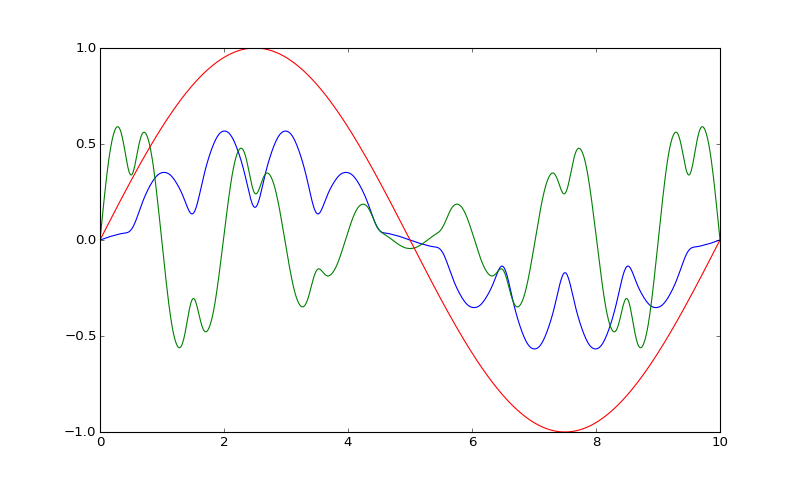

In [26]:
figure()
plt.plot(x, -psi(1))
plt.plot(x, -psi(10))
plt.plot(x,env(2))
plt.show()


In [22]:
import operator

In [125]:
a=1.
b=1/6.
v0=100.
nb=10
l=10

In [92]:
x=np.linspace(0,l,1000)

In [179]:
s= []
for i in range(0,len(x)):
      s=np.append(s,pot(x[i]))

In [193]:
pot = lambda x: v0 if operator.mod(x-a/2,a) < b/2 else 0


In [200]:
pot(a/2)

100.0

<IPython.core.display.Javascript object>


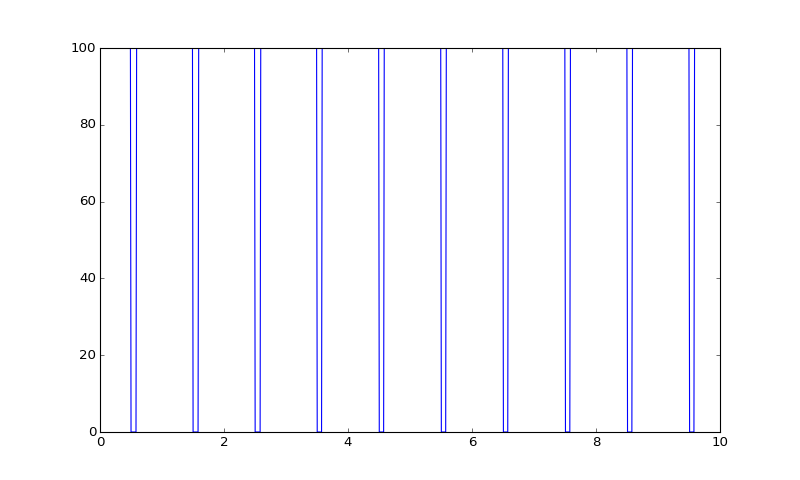

In [195]:
figure()
plt.plot(x,s)
